In [ ]:
import pandas as pd
import numpy as np
import io 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Uploading the Penguin.csv dataset onto google colab
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size (1).csv


In [ ]:
# Reading in file using Pandas
df = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))

#1. Exploratory Data Analysis


In [ ]:
# Reading the initial data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Checking head of data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


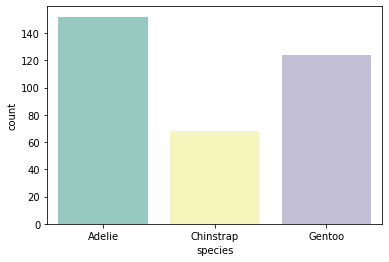

In [ ]:
# Printing countplot
sns.countplot(df['species'],palette='Set3');

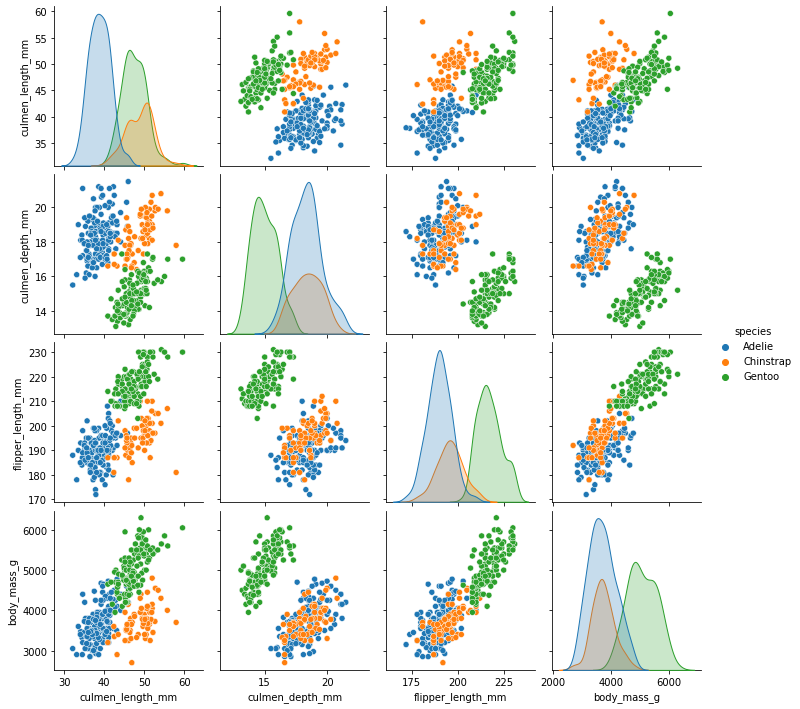

In [ ]:
# Pairing all the graphs
sns.pairplot(df,hue='species')

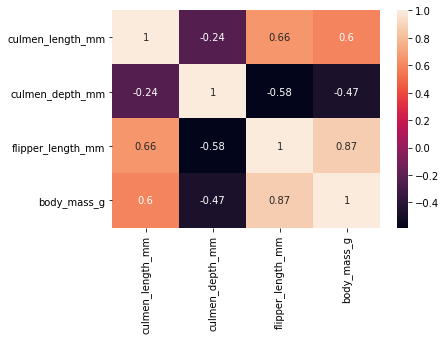

In [ ]:
sns.heatmap(df.corr(), annot=True)

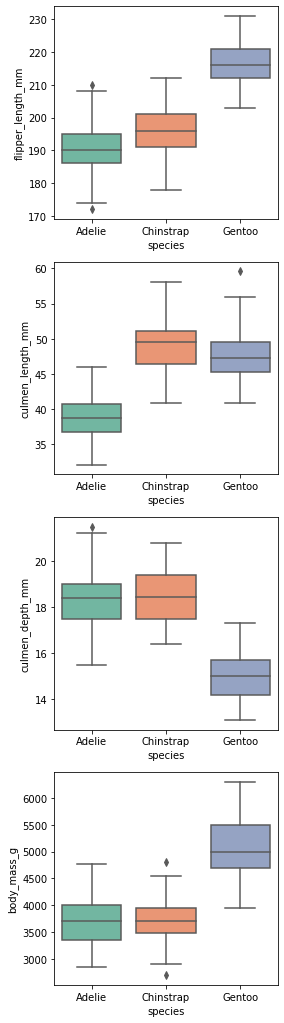

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(4,18))

# Checking boxplots to examine the differences

sns.boxplot(x=df.species,y=df.culmen_length_mm,ax=axes[1],palette='Set2')
sns.boxplot(x=df.species,y=df.culmen_depth_mm,ax=axes[2],palette='Set2')
sns.boxplot(x=df.species,y=df.body_mass_g,ax=axes[3],palette='Set2')
sns.boxplot(x=df.species,y=df.flipper_length_mm,ax=axes[0],palette='Set2')
# plt.tight_layout();

In [ ]:
# Finding missing values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# Filling null values using length 

df['sex'].fillna(df['sex'].mode()[0], inplace=True)
#df['species'].fillna(df['species'].mode(), inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Seeing a missing value
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
# Filling it out
df.loc[336,'sex'] = 'FEMALE'

#2. Creating a KMeans Model


In [ ]:
# Numerizing the Data for the species
#df['species'] = df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

In [ ]:
X = pd.get_dummies(df)
X.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.10000,18.70000,181.000000,3750.000000,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [ ]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

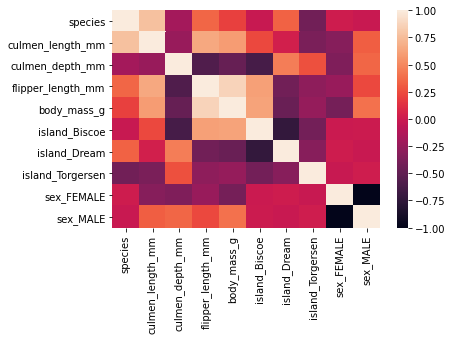

In [ ]:
sns.heatmap(X.corr())

#3. Using for loop to create multiple models and then using the elbow method


In [ ]:
ssd = []

for i in range(2, 11):
  model = KMeans(n_clusters=i)
  model.fit(scaled_X)
  ssd.append(model.inertia_)

Text(0, 0.5, 'Sum Of Squared Distances')

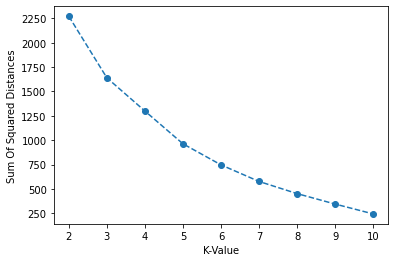

In [ ]:
# Using the Elbow Method
plt.plot(range(2, 11), ssd, 'o--')
plt.xlabel("K-Value")
plt.ylabel("Sum Of Squared Distances")

On observation the K-Value to select using the elbow method is K=3

In [ ]:
# 4
'''
The Result : The KMeans clustering model did not do that great going down to only
 250 for its SSD value when the cluster values was 10.
 Model Performance and accuracy was not that good
'''